# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

***Answer**: It has 4 degrees of freedom.*

**b)** Why is it bad for a model to have too many degrees of freedom?

***Answer**: Too many degrees of freedom may cause overfitting to the training data.*

**c)** Why is it bad for a model to have too few degrees of freedom?

***Answer**: Too few degrees of freedom may make it so that it is impossible to properly fit the data.*

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

***Answer**: The effective degrees of freedom is defined as*
$$df(\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda},$$
where $p$ is the number of free parameters, d_j are the singular values of $\boldsymbol{X}$, and $\lambda$ is a hyperparameter.



**e)** Why might we want to use Ridge regression instead of OLS?

***Answer**: Ridge regression shrinks the regression coefficients. Methods like this often suffer less from high variability.*

**f)** Why migth we want to use OLS instead of Ridge regression?

***Answer**: When fitting a model to a simple function there might not be any reason to introduce a shrinkage of coefficients, because even with all coefficients for simple functions OLS still works.*

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Answer 2a):\
The Ridge regression cost function is a convex function, which means that we can find the optimal parameters $\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}}$ where the cost functions derivate with respect to $\boldsymbol{\beta}$ is equal to zero. First we find the derivative for the term $\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2$:

\begin{align*}
\frac{\partial}{\partial \boldsymbol{\beta}} \lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
&= \frac{\partial}{\partial \boldsymbol{\beta}} \lambda \boldsymbol{\beta}^T \boldsymbol{\beta} \\
&= \lambda \frac{\partial}{\partial \boldsymbol{\beta}} \left( \sum^{p-1}_{i=0} \beta_i^2 \right)\\
&= \lambda \begin{bmatrix}\frac{\partial}{\partial \beta_0} \left( \sum^{p-1}_{i=0} \beta_i^2 \right) & \frac{\partial}{\partial \beta_1} \left( \sum^{p-1}_{i=0} \beta_i^2 \right) & \cdots & \frac{\partial}{\partial \beta_{p-1}} \left( \sum^{p-1}_{i=0} \beta_i^2 \right)\end{bmatrix}\\
&= \lambda \begin{bmatrix}2\beta_0 & 2\beta_1 & \cdots & 2\beta_{p-1}\end{bmatrix}\\
&= 2\lambda \boldsymbol{\beta}^T
\end{align*}

I showed in last weeks exercises (week 35) 2c) that
$$\frac{\partial \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)}{\partial \boldsymbol{\beta}} = -2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\boldsymbol{X}
$$ 

which means that the final derivative of the cost function is

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \left(\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \right)
= -2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\boldsymbol{X} + 2\lambda \boldsymbol{\beta}^T
$$

Then by setting it equal to zero and solving for $\boldsymbol{\beta}$ we finally obtain the optimal parameters.

\begin{align*}
-2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\boldsymbol{X} + 2\lambda \boldsymbol{\beta}^T
&= 0 \\
-\boldsymbol{y}^T\boldsymbol{X}+\boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{X} + \boldsymbol{\beta}^T \lambda \boldsymbol{I} &= 0 \\
\boldsymbol{\beta}^T \left(\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I} \right) &= \boldsymbol{y}^T\boldsymbol{X}\\
\left(\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I} \right)^T \boldsymbol{\beta} &= \left(\boldsymbol{y}^T\boldsymbol{X}\right)^T\\
\left(\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I} \right) \boldsymbol{\beta} 
&= \boldsymbol{X}^T\boldsymbol{y}\\
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} &= \underline{\underline{\left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}}}
\end{align*}

## Exercise 3 - Scaling data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [3]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        for degree in range(1, p+1):
            X[:, degree] = x ** degree
        return X
    else:
        X = np.zeros((n, p))
        for degree in range(1, p+1):
            X[:, degree-1] = x ** degree
        return X


**b)** Split your data into training and test data(80/20 split)

In [4]:
X = polynomial_features(x, 8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [7]:
def Ridge_parameters(X, y, lambda_value=0.1):
    I = np.identity(X.shape[1])
    return np.linalg.inv((X.T @ X) + lambda_value*I) @ X.T @ y

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

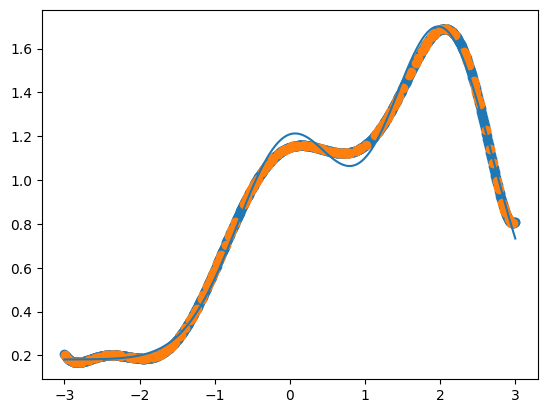

In [8]:
beta = Ridge_parameters(X_train_s, y_train - y_offset, lambda_value=0.01)

plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)
plt.show()

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [9]:
def MSE(y, y_pred):
    return np.mean((y-y_pred)**2)

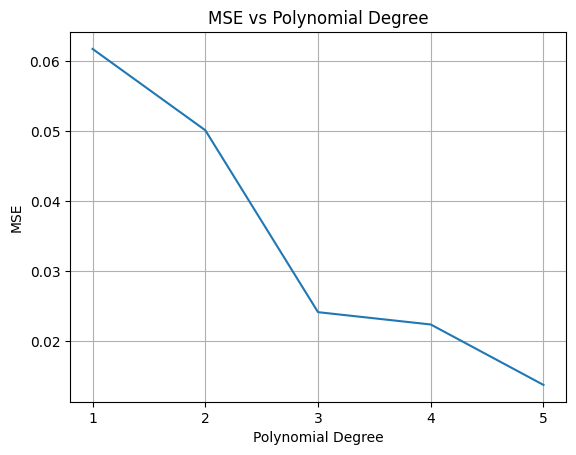

In [10]:
# a)
min_degree = 1
max_degree = 5
degrees = range(min_degree, max_degree+1)
degree_MSE = np.zeros(max_degree-min_degree+1)
for p in degrees:
    X = polynomial_features(x, p, intercept=False)
    X_train, X_test, y_train, y_test,  = train_test_split(X, y,  test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)
    beta = Ridge_parameters(X_train_s, y_train-y_offset, lambda_value=0.01)
    y_test_pred = X_test_s @ beta + y_offset
    degree_MSE[p-min_degree] = MSE(y_test, y_test_pred)

plt.figure()
plt.plot(degrees, degree_MSE)
plt.xticks(degrees)
plt.grid()
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.show()

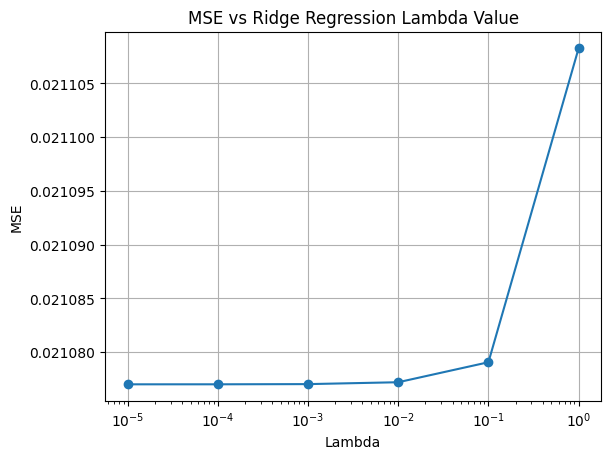

In [11]:
# b)
degree = 3
lambda_steps = 6
lambdas = np.logspace(0, -5, lambda_steps)

X = polynomial_features(x, degree)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

lambda_MSE = np.zeros(lambda_steps)
for i, lambda_value in enumerate(lambdas):
    beta = Ridge_parameters(X_train_s, y_train-y_offset, lambda_value=lambda_value)
    y_test_pred = X_test_s @ beta + y_offset
    lambda_MSE[i] = MSE(y_test, y_test_pred)

plt.figure()
plt.plot(lambdas, lambda_MSE, marker="o")
plt.grid()
plt.semilogx()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs Ridge Regression Lambda Value')
plt.show()

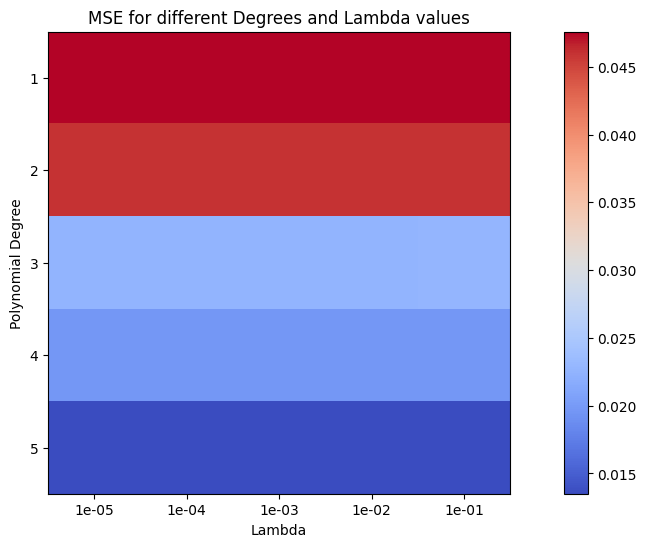

In [12]:
# c)
def calculate_degree_lambda_mse(degrees, lambdas):
    degree_lambda_MSE = np.zeros((len(degrees), len(lambdas)))
    for i, degree in enumerate(degrees):
        X = polynomial_features(x, degree, intercept=False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_offset = np.mean(y_train)
        
        for j, lambda_value in enumerate(lambdas):
            beta = Ridge_parameters(X_train_s, y_train-y_offset, lambda_value=lambda_value)
            y_test_pred = X_test_s @ beta + y_offset
            degree_lambda_MSE[i][j] = MSE(y_test, y_test_pred)
    
    return degree_lambda_MSE


degrees = range(1, 5+1)
lambda_steps = 5
lambdas = np.logspace(-5, -1, lambda_steps)
degree_lambda_MSE = calculate_degree_lambda_mse(degrees, lambdas)

fig, ax = plt.subplots(figsize=(14, 6))
im = ax.imshow(degree_lambda_MSE, cmap="coolwarm")
ax.set_xticks(np.arange(len(lambdas)))
ax.set_xticklabels([f"{l:.0e}" for l in lambdas])
ax.set_yticks(np.arange(len(degrees)))
ax.set_yticklabels([str(d) for d in degrees])

ax.set_xlabel('Lambda')
ax.set_ylabel('Polynomial Degree')
plt.title('MSE for different Degrees and Lambda values')
fig.colorbar(im)
plt.show()
    

There is no visible difference between lambda values in this range. However for higher degree polynomials and larger lambda values we see a greater difference:

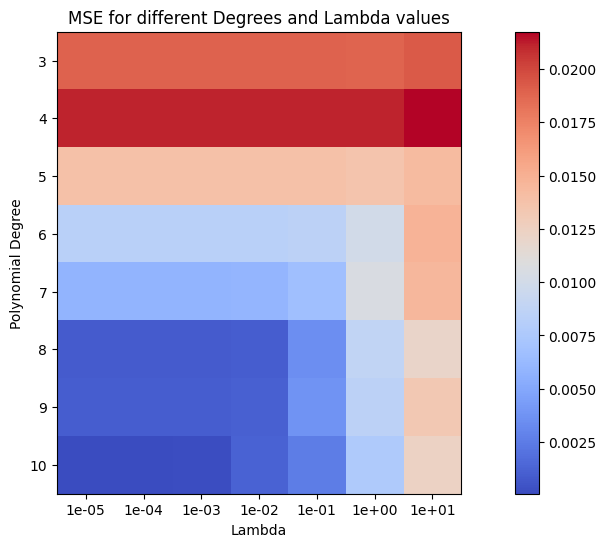

In [13]:
degrees = range(3, 10+1)
lambda_steps = 7
lambdas = np.logspace(-5, 1, lambda_steps)
degree_lambda_MSE = calculate_degree_lambda_mse(degrees, lambdas)

fig, ax = plt.subplots(figsize=(14, 6))
im = ax.imshow(degree_lambda_MSE, cmap="coolwarm")
ax.set_xticks(np.arange(len(lambdas)))
ax.set_xticklabels([f"{l:.0e}" for l in lambdas])
ax.set_yticks(np.arange(len(degrees)))
ax.set_yticklabels([str(d) for d in degrees])

ax.set_xlabel('Lambda')
ax.set_ylabel('Polynomial Degree')
plt.title('MSE for different Degrees and Lambda values')
fig.colorbar(im)
plt.show()